In [1]:
import numpy as np 
import sciann as sn 
import matplotlib.pyplot as plt 
import scipy.io

from numpy import pi
from sciann.utils.math import diff, sign, sin



---------------------- SCIANN 0.6.0.4 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 




Epoch 00997: ReduceLROnPlateau reducing learning rate to 0.0010000000474974513.

Epoch 03256: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.


/apps/local/anaconda/Anaconda3-2020.11/envs/tensorflow-2.4-horovod-cuda-11.2/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


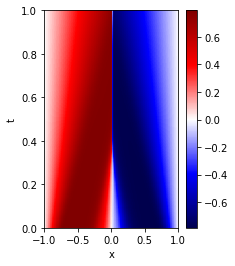

In [2]:

x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [t,x], 8*[20], 'tanh')

L1 = diff(u, t) + u*diff(u,x) - (0.01/pi)*diff(u, x, order=2)
TOL = 0.001
C1 = (1-sign(t - TOL)) * (u + sin(pi*x))
C2 = (1-sign(x - (-1+TOL))) * (u)
C3 = (1+sign(x - ( 1-TOL))) * (u)
m = sn.SciModel([x, t], [L1, C1, C2, C3])

x_data, t_data = np.meshgrid(
    np.linspace(-1, 1, 100), 
    np.linspace(0, 1, 100)
)

h = m.train([x_data, t_data], 4*['zero'], learning_rate=0.002, epochs=5000, verbose=0)

x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200), 
    np.linspace(0, 1, 200)
)
u_pred = u.eval(m, [x_test, t_test])

fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()